In [9]:
pip install p

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
##font type : otf, ttf
plt.rcParams['font.family'] = 'Gulim'

In [11]:
df = pd.read_csv('ns_book7.csv', low_memory=False)

In [12]:
df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [13]:
df.발행년도.value_counts()

발행년도
2012.0    18601
2014.0    17797
2009.0    17611
2011.0    17523
2010.0    17503
          ...  
2650.0        1
2108.0        1
2104.0        1
2560.0        1
1947.0        1
Name: count, Length: 87, dtype: int64

In [14]:
new_df = df.발행년도.value_counts().reset_index()

In [15]:
new_df

,발행년도,count
0,2012.0,18601
1,2014.0,17797
2,2009.0,17611
3,2011.0,17523
4,2010.0,17503
...,...,...
82,2650.0,1
83,2108.0,1
84,2104.0,1
85,2560.0,1


In [16]:
new_df.columns = ['발행년도', '발행부수']
new_df

,발행년도,발행부수
0,2012.0,18601
1,2014.0,17797
2,2009.0,17611
3,2011.0,17523
4,2010.0,17503
...,...,...
82,2650.0,1
83,2108.0,1
84,2104.0,1
85,2560.0,1


In [17]:
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [18]:
#고유한 출판사 목록
#value_counts()메서드 사용
#카운트가 높은 순으로 결과를 내림차순 정렬
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64

In [19]:
#상위 30개 출판사에 해당하는 불리언 인덱스
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [20]:
top30_pubs_idx.sum()

51886

In [21]:
#너무 많은 데이터
#간추려서 사용하기 위해 1000개만 선택
#데이터프레임의 행을 무작위로 선택하기 위해 sample()메서드 사용
#그리고 random_state매개변수에 임의의 숫자를 적음 numpy의 seed()함수와 비슷한 역할
#동일한 값을 전달하면 항상 같은 결과

ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012.0,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007.0,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013.0,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017.0,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017.0,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


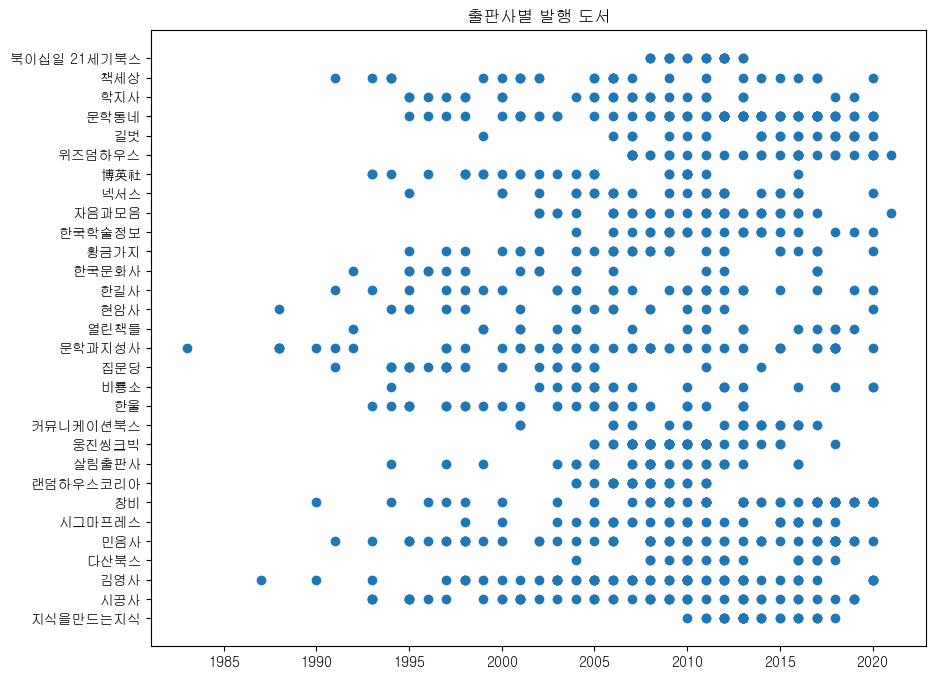

In [23]:
fig, axs = plt.subplots(figsize=(10,8))
axs.scatter(ns_book8['발행년도'], ns_book8['출판사'])
axs.set_title('출판사별 발행 도서')
fig.show()

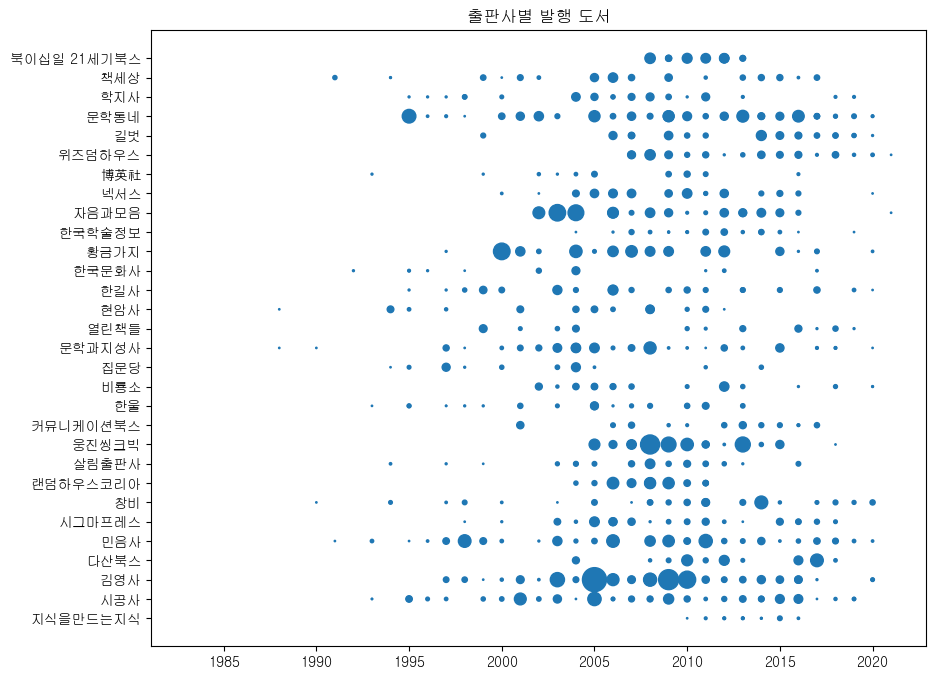

In [24]:
#위를 보면 어느 해에 발행했는지만 나오고 얼마나 많은 도서가 대출되었는지는 알 수 없다.
#값에 따라 마커 크기를 다르게 나타내서 이를 해결
#마커 크기를 지정할 수 있는 scatter()함수의 s매개변수 사용

fig, axs = plt.subplots(figsize=(10,8))
axs.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
axs.set_title('출판사별 발행 도서')
fig.show()

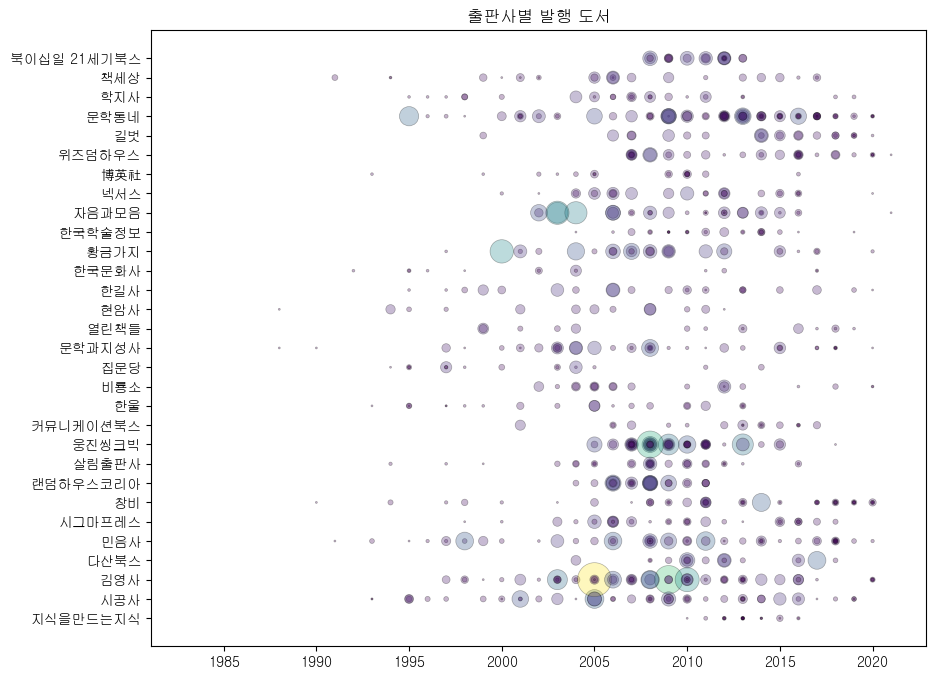

In [25]:
#마커 꾸미기
#투명도 조절 - alpha 매개변수
#마커 테두리 색 - edgecolor
#마커 테드리 선 두께 변경 - linewidths 매개변수
#산점도 색 변경 - c매개변수

fig, axs = plt.subplots(figsize=(10,8))
axs.scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolor='k', alpha=0.3, s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
axs.set_title('출판사별 발행 도서')
fig.show()

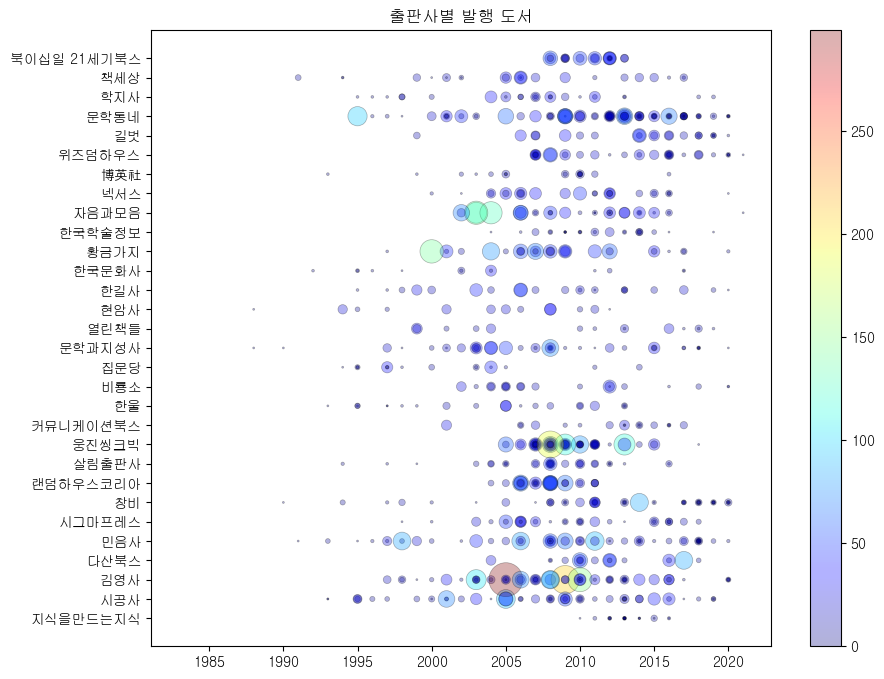

In [26]:
#값에 따라 색상 표현 - 컬러맵
#scatter()함수의 cmap매개변수로 지정할 수 있고
#컬러 막대는 scatter()함수가 반환하는 객체를 colorbar()메서드에 전달하여 사용

fig, axs = plt.subplots(figsize=(10,8))
sc = axs.scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolor='k', alpha=0.3, 
            s=ns_book8['대출건수']*2, c=ns_book8['대출건수'], cmap='jet')
axs.set_title('출판사별 발행 도서')
fig.colorbar(sc)
fig.show()

In [27]:
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [28]:
#하나의 피겨에 여러 개의 선 그래프 그리기
#상위 30% 출판사 발행년도 대출건수 열추출
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]

In [29]:
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum() #출판사/발행년도 별로 묶어서 대출건수를 sum

In [30]:
ns_book9 = ns_book9.reset_index()

In [31]:
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995.0,0
859,황금가지,1996.0,67
860,황금가지,1997.0,116
861,황금가지,1998.0,526
862,황금가지,1999.0,505


In [32]:
#선그래프 2개
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']
                 

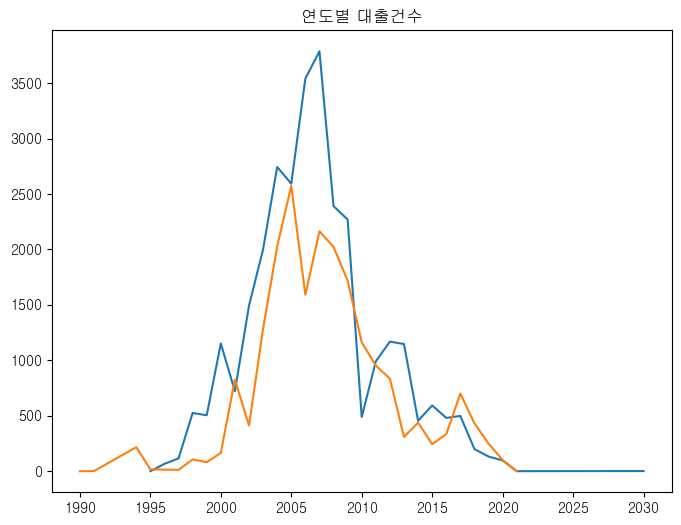

In [33]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(line1['발행년도'], line1['대출건수'])
axs.plot(line2['발행년도'], line2['대출건수'])
axs.set_title('연도별 대출건수')
fig.show()

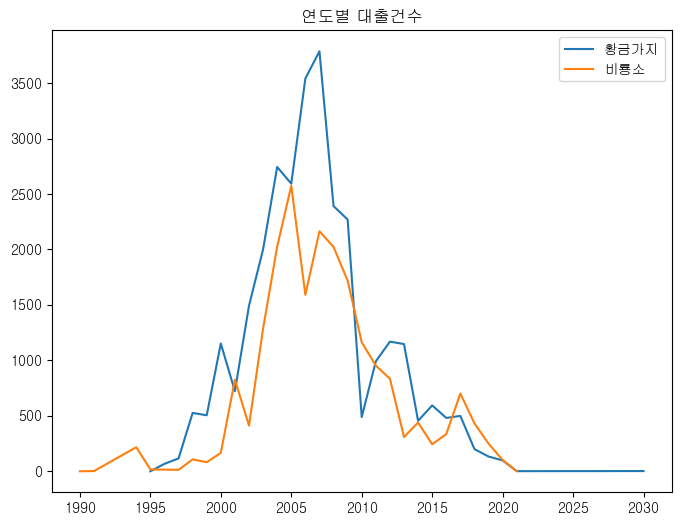

In [34]:
#선이 많아질수록 헷갈림
#legend()메서드를 호출하여 범례를 설정
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
axs.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
axs.set_title('연도별 대출건수')
axs.legend()
fig.show()

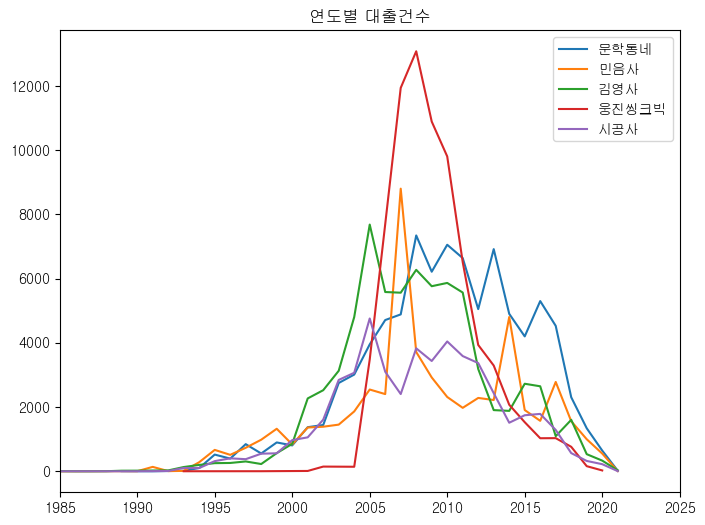

In [35]:
#5개 선그래프 그리기
fig, axs = plt.subplots(figsize = (8, 6))
for pubs in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pubs]
    axs.plot(line['발행년도'], line['대출건수'], label=pubs)
    
axs.set_title('연도별 대출건수')
axs.legend()
axs.set_xlim(1985, 2025)
#1970년도부터 시작하기 때문에 연도지정을 하지 않으면 오른쪽으로 많이 지우쳐져 있음 따라가 set_xlim()메서드 사용
#y축은 set_ylim()
fig.show()

In [36]:
#스택영역그래프
#하나의 선 그래프 위에 다른 선 그래프를 차례대로 쌓은 것
#stackplot()메서드
#첫번째 매개변수에는 x축의 값을 두번째 매개변수에는 y축의 값을 2차원 배열로 전달해야 한다.
#단계별 정리
#1. pivot_table() 메서드로 각 열의 값을 열로 바꾸기(2차원 배열 만들기)
#2. 열을 리스트 형태로 바꾸기(x축에 넣을 리스트)
#3. stackplot()메서드로 스택 영역 그래프 그리기

In [37]:
#pandas의 pivot_table()메서드로 하나의 열을 2차원 배열로 바꾸는 것처럼 데이터 구조를 바꿀 수 있다.
#index매개변수와 columns매개변수에 원본 데이터프레임의 열을 지정하면 각 열의 고유한 값이 피벗 테이블로 변환된 데이터 프레임의 인덱스와 열이 된다.

In [38]:
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                                                 \
발행년도 1947.0 1974.0 1975.0 1976.0 1977.0 1978.0 1979.0 1980.0 1981.0 1982.0   
출판사                                                                          
博英社     0.0    NaN    0.0    NaN    0.0    NaN    NaN    NaN    NaN    NaN   
길벗      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
김영사     NaN    NaN    NaN    NaN    NaN    NaN    NaN    0.0    0.0    0.0   
넥서스     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
다산북스    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ...                                                                \
발행년도  ...  2013.0  2014.0  2015.0  2016.0  2017.0  2018.0 2019.0 2020.0   
출판사   ...                                                                 
博英社   ...     NaN   118.0    57.0    47.0     2.0     8.0    NaN    1.0   
길벗    ...  1162.0  1619.0  1410.0  1597.0  1626.0  1004.0  773.0  292.0   
김영사   ...  1905.0  1881.0  2726.0  2647.0  1094.0  1602.0  533.0  332.0   
넥서스   ...  1828.0  1429.0   765.0  1146.0   932.0   565.0   90.0   15.0   
다산북스  ...  1100.0  1361.0  1321.0  1137.0  1249.0   773.0  530.0  127.0   

                    
발행년도 2021.0 2030.0  
출판사                 
博英社     NaN    NaN  
길벗     12.0    NaN  
김영사    30.0    NaN  
넥서스     0.0    NaN  
다산북스   13.0    NaN  

[5 rows x 50 columns]

In [39]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947.0),
            ('대출건수', 1974.0),
            ('대출건수', 1975.0),
            ('대출건수', 1976.0),
            ('대출건수', 1977.0),
            ('대출건수', 1978.0),
            ('대출건수', 1979.0),
            ('대출건수', 1980.0),
            ('대출건수', 1981.0),
            ('대출건수', 1982.0)],
           names=[None, '발행년도'])

In [40]:
#열을 리스트형태로 변경
#get_level_values()메서드
#다단으로 구성된 열 이름에서 선택한 항목만 가져옴
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1) #연도만 가져오기
year_cols

Index([1947.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0,
       1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
       1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
       2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0,
       2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
       2018.0, 2019.0, 2020.0, 2021.0, 2030.0],
      dtype='float64', name='발행년도')

In [41]:
#stackplot()메서드로 스택 영역 그래프 그리기
#
#
#
#p.358 ~ p.379까지 해야함

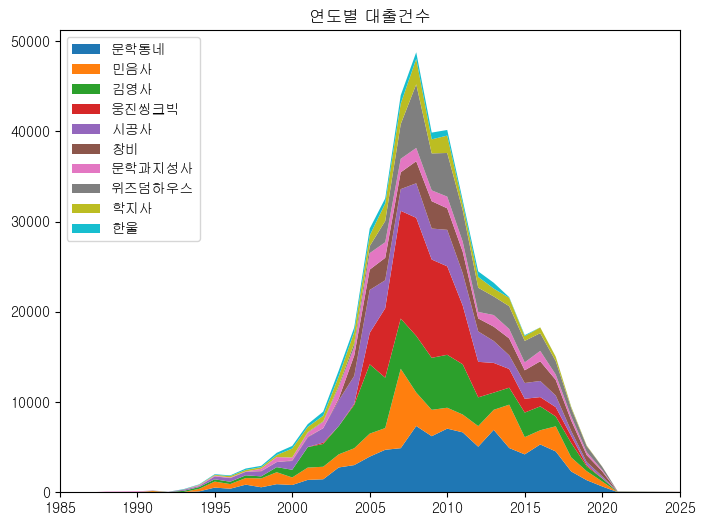

In [42]:
fig, axs = plt.subplots(figsize = (8,6))
axs.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axs.set_title('연도별 대출건수')
axs.legend(loc='upper left') #범례 왼쪽 상단
axs.set_xlim(1985, 2025)
fig.show()

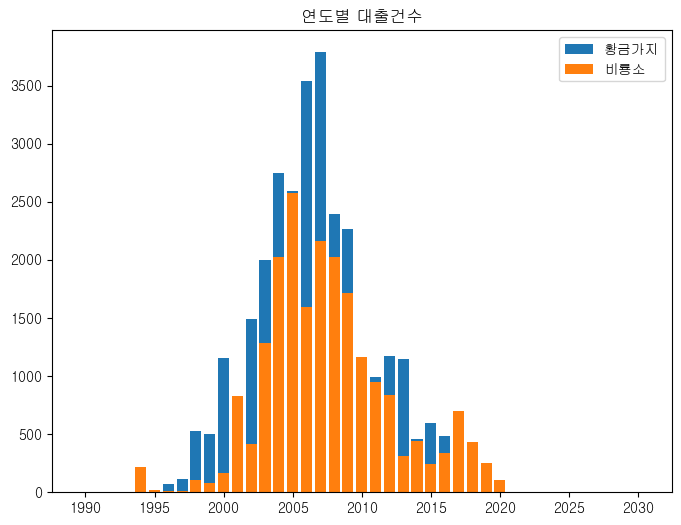

In [43]:
#막대그래프 여러개
#선그래프와 동일
#잘못된 예시
fig, axs = plt.subplots(figsize=(8, 6))
axs.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
axs.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
axs.set_title('연도별 대출건수')
axs.legend()
fig.show()

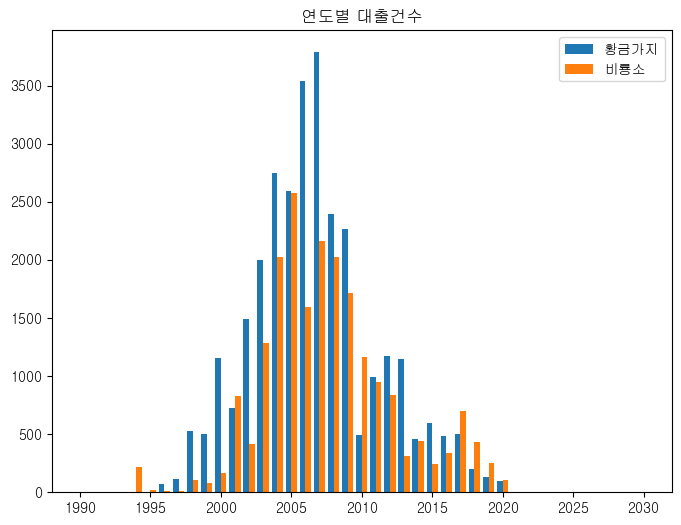

In [44]:
#좋은 예시
fig, axs = plt.subplots(figsize=(8, 6))
axs.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4 , label='황금가지')  #+- 0.2로 막대 위치 이동 / width로 막대너비 지정
axs.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
axs.set_title('연도별 대출건수')
axs.legend()
fig.show()

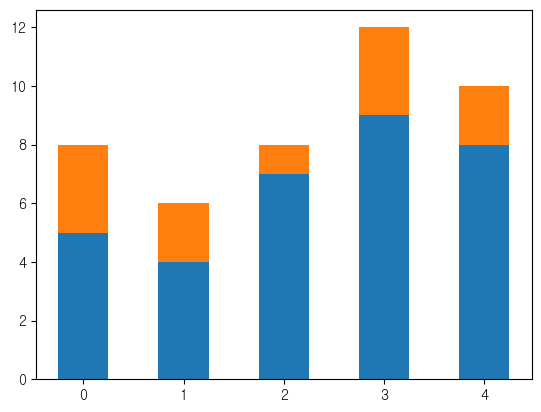

In [45]:
#스택 막대 그래프
#막대 그래프를 옆으로 나란히 놓는것이 아닌 위로 쌓는 것
#여러 막대를 표현하는데 부담이 줄어듬
#matplotlib에는 stackplot()메서드처럼 막대 그래프를 쌓을 수 있는 함수 X
#하지만 bar() 메서드의 bottom 매개변수를 사용하면 수동으로 막대를 쌓을 수 있다.
#막대가 시작할 y좌표를 결정

height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 1, 3, 2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

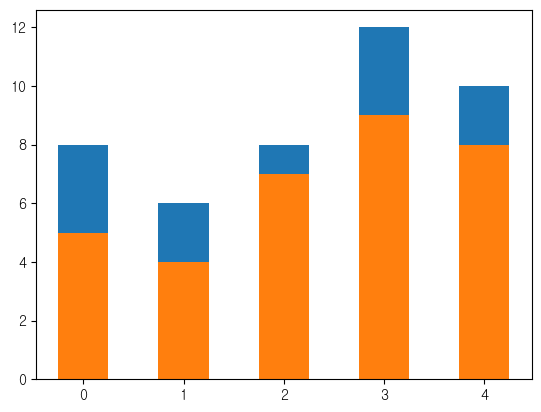

In [46]:
height3 = [a + b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

In [48]:
#데이터값 누적해서 그리기
#pandas dataframe의 cumsum()메서드
#값 누적 편리

In [49]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수',2020)]

대출건수                                                       
발행년도   2013.0  2014.0  2015.0  2016.0  2017.0  2018.0  2019.0 2020.0
출판사                                                                 
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [51]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수',2020)].cumsum()

#대출건수가 밑으로 내려갈수록 누적되어 저장

대출건수                                                            
발행년도    2013.0   2014.0   2015.0   2016.0   2017.0  2018.0  2019.0  2020.0
출판사                                                                       
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [52]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

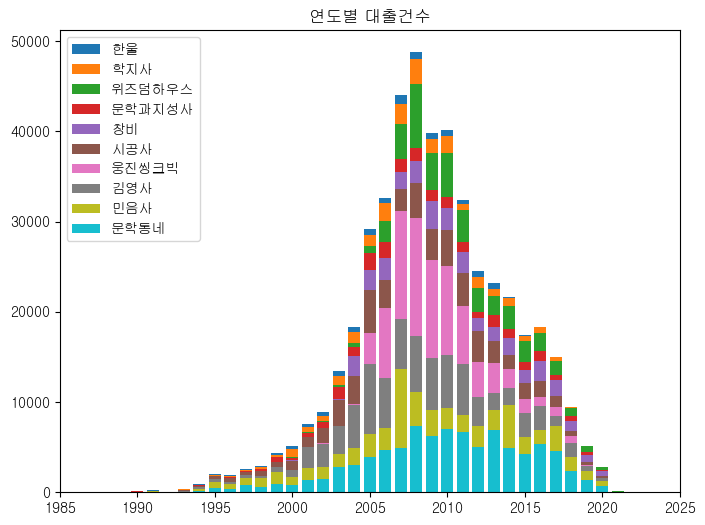

In [54]:
#가장 큰값이 먼저 그려져야 한다는 점
#range()함수로 ns_book12 데이터프레임 행 개수만큼 인덱스 번호를 만들고
#for문에 reversed()함수를 사용해 인덱스의 역순으로 반복하여 그리면 끝
fig, axs = plt.subplots(figsize=(8,6))
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]
    label = ns_book12.index[i]
    axs.bar(year_cols, bar, label=label)
axs.set_title('연도별 대출건수')
axs.legend(loc='upper left')
axs.set_xlim(1985, 2025)
fig.show()

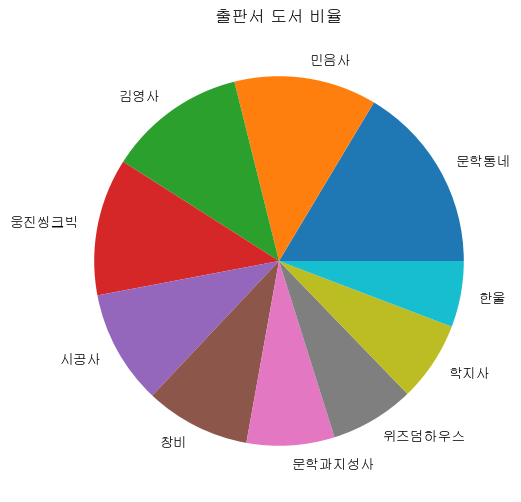

In [57]:
#pi그래프
#pie chart

data = top30_pubs[:10]
labels = top30_pubs.index[:10]

#matplotlib의 pie() 메서드
#첫번째 매개변수에 정의한 data를 전달하면 자동으로 데이터 전체에 대한 비율을 계산하여 그래프를 보여줌
#부채꼴 모양 위에 표시할 출판사 이름은 labels 매개변수로 전달
fig, axs = plt.subplots(figsize=(8, 6))
axs.pie(data, labels=labels)
axs.set_title('출판서 도서 비율')
fig.show()

#원 그래프의 단점
#선 그래프나 막대 그래프와 달리 원 그래프는 시각적으로 어떤 데이터가 더 큰지 한눈에 구분하기 어렵다.

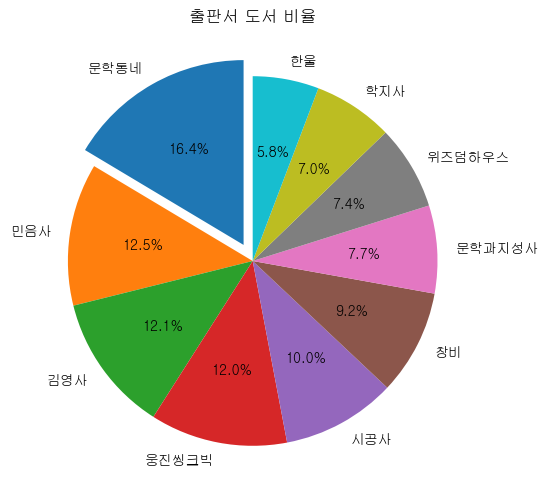

In [58]:
#비율 표시하고 부채꼴 강조하기
#pie()메서드의 autopct매개변수에는 파이썬의 %연산자에 적용할 포맷팅문자열을 전달할 수 있다.
#explode 매개변수를 통해 중요한 항목의 경우 해당 부채꼴 조각을 원 그래프에서 조금 떨어뜨려 시각적으로 부각시킬 수 있다.

fig, axs = plt.subplots(figsize=(8, 6))
axs.pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
axs.set_title('출판서 도서 비율')
fig.show()

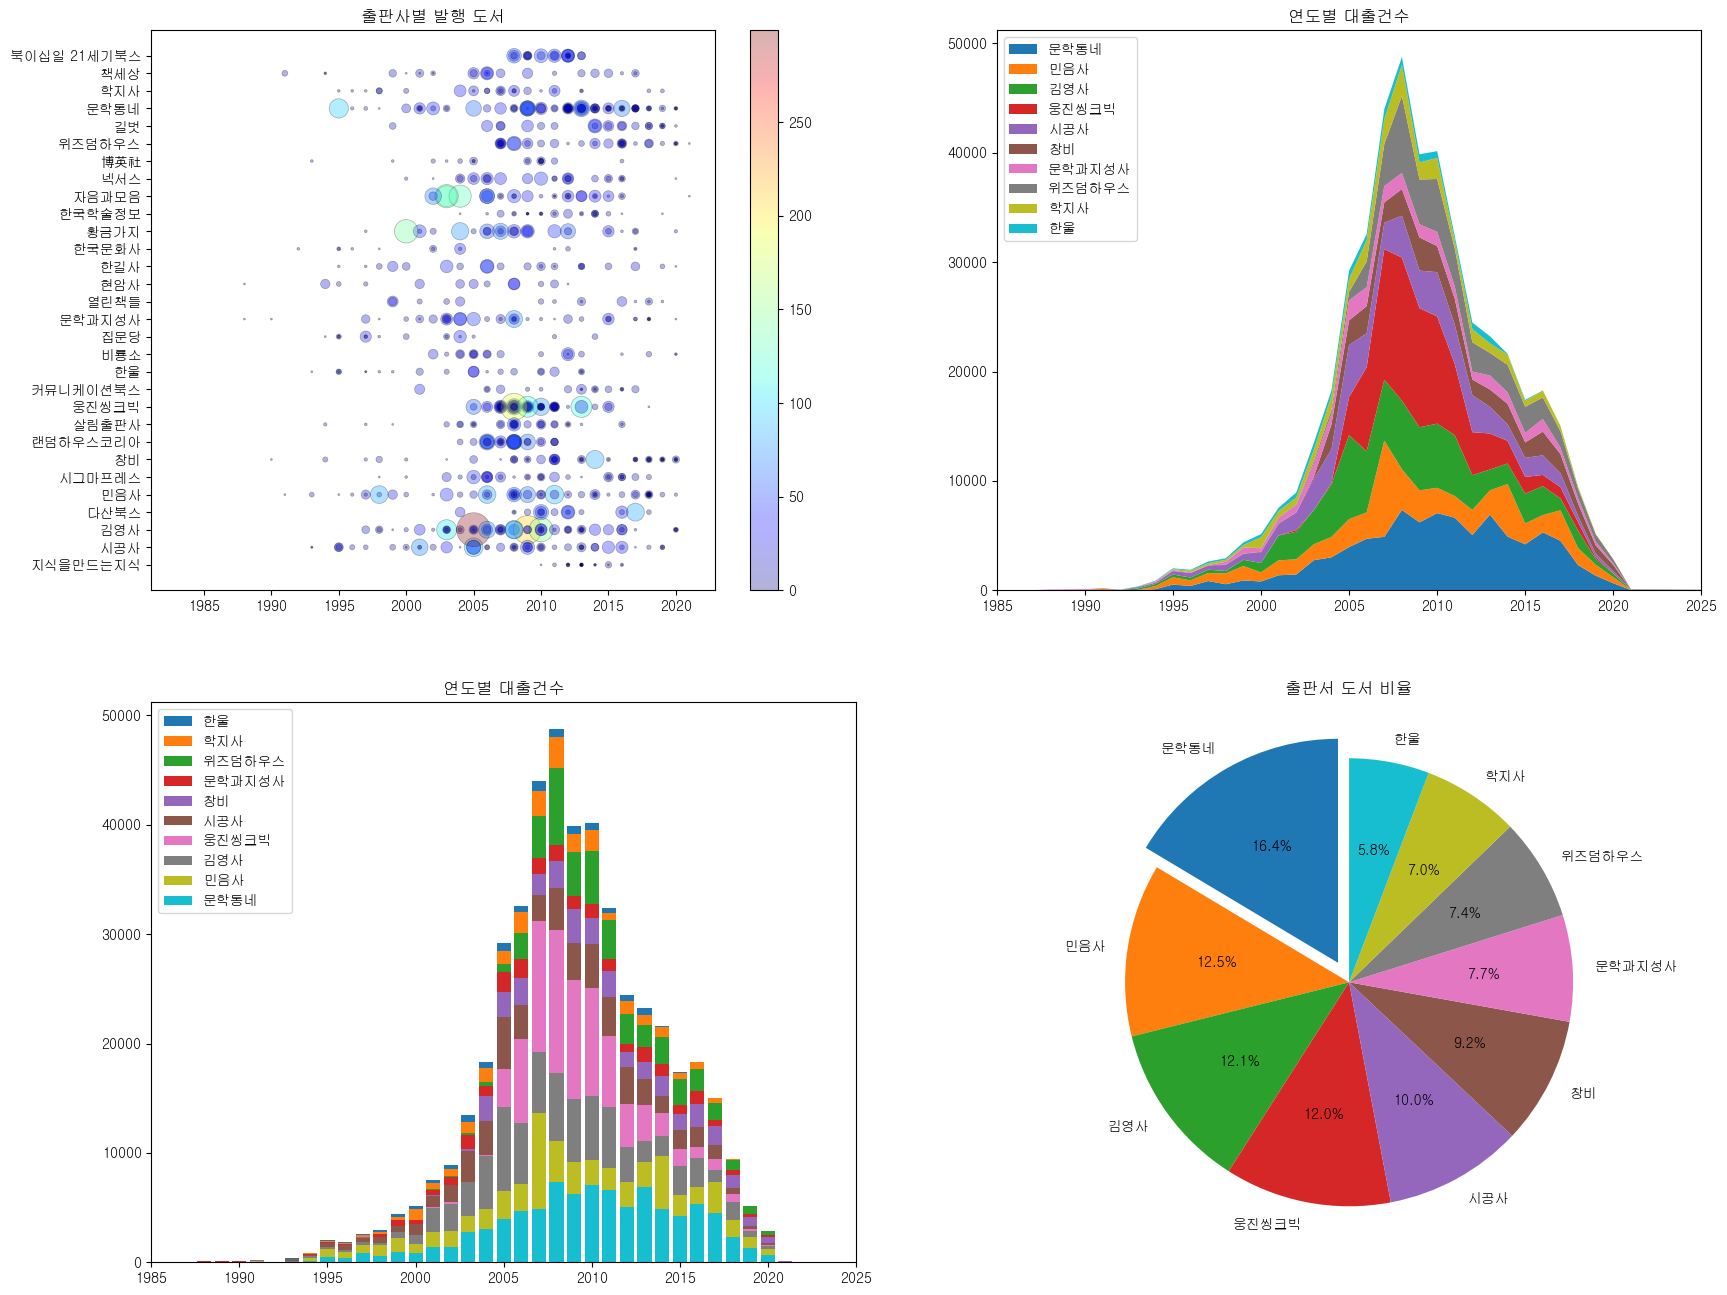

In [62]:
#4개 그래프 그리기
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

#산점도
sc = axs[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolor='k', alpha=0.3, 
            s=ns_book8['대출건수']*2, c=ns_book8['대출건수'], cmap='jet')
axs[0, 0].set_title('출판사별 발행 도서')
fig.colorbar(sc)

#스택영역그래프
axs[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axs[0, 1].set_title('연도별 대출건수')
axs[0, 1].legend(loc='upper left') #범례 왼쪽 상단
axs[0, 1].set_xlim(1985, 2025)
#스택막대그래프
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]
    label = ns_book12.index[i]
    axs[1, 0].bar(year_cols, bar, label=label)
axs[1, 0].set_title('연도별 대출건수')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_xlim(1985, 2025)
#원그래프
axs[1, 1].pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
axs[1, 1].set_title('출판서 도서 비율')


fig.savefig('all_in_one.png')
fig.show()